In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/real-estate-goldmine-dubai-uae-rental-market/dubai_properties.csv")

## EDA ##

In [3]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

<Axes: ylabel='Frequency'>

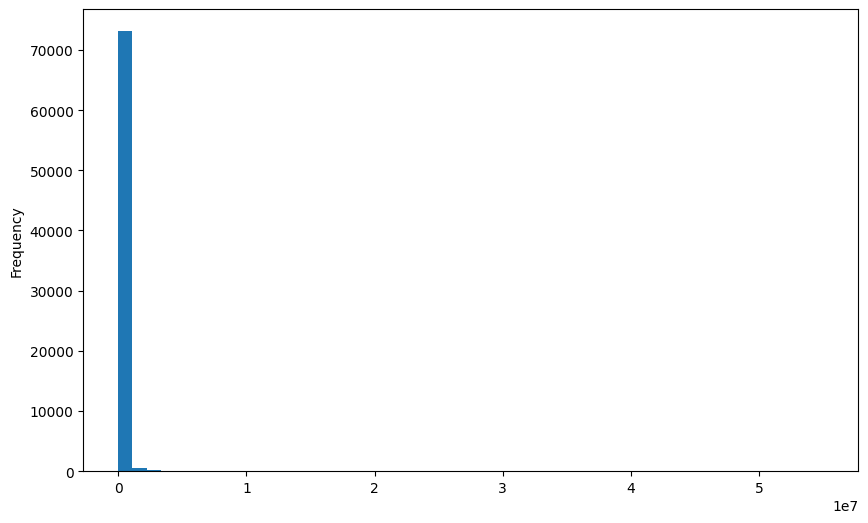

In [5]:
#Kirra Dağılımı
df['Rent'].plot.hist(bins=50, figsize=(10, 6))

In [6]:
#kira describe
summary=df['Rent'].describe()
print(summary.to_string(float_format="%.0f"))

count      73742
mean      147925
std       306966
min            0
25%        54999
50%        98000
75%       170000
max     55000000


<Axes: ylabel='count'>

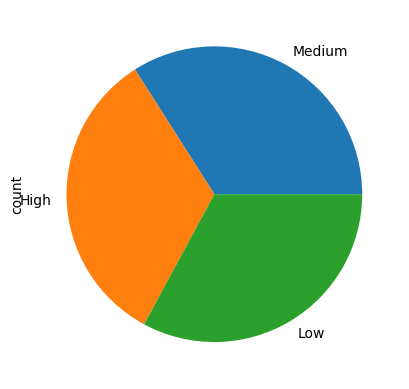

In [7]:
#Kira fiyatı kategori
df["Rent_category"].value_counts().plot.pie()

In [8]:
df.isnull().sum()

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

In [9]:
df.drop('Address',axis=1,inplace=True)

In [10]:
df

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73737,14000,0,1,Apartment,419,33.412888,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Al Salamah,Umm Al Quwain,25.493412,55.575994
73738,14000,0,1,Apartment,500,28.000000,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.606527
73739,50000,3,4,Apartment,2000,25.000000,Low,Yearly,Unfurnished,For Rent,2024-01-02,110,King Faisal Street,Umm Al Quwain,NaN,NaN
73740,37000,1,2,Apartment,989,37.411527,Low,Yearly,Unfurnished,For Rent,2023-10-23,181,Al Maqtaa,Umm Al Quwain,NaN,NaN


In [11]:
df['Type'].value_counts()

Type
Apartment               56534
Villa                   12883
Townhouse                3421
Hotel Apartment           465
Penthouse                 270
Villa Compound            107
Residential Building       44
Residential Floor          12
Residential Plot            6
Name: count, dtype: int64

In [12]:
#rent category kodlamaya çevir
df['Rent_category'].replace({'Low':0,'Medium':1,'High':2},inplace=True)

/tmp/ipykernel_18/859821994.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rent_category'].replace({'Low':0,'Medium':1,'High':2},inplace=True)
/tmp/ipykernel_18/859821994.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Rent_category'].replace({'Low':0,'Medium':1,'High':2},inplace=Tr

In [13]:
#Hepsi yıllık
df['Frequency'].value_counts()

Frequency
Yearly    73742
Name: count, dtype: int64

In [14]:
df.drop('Frequency',axis=1,inplace=True)

In [15]:
#Hepsi kiralık
df['Purpose'].value_counts()

Purpose
For Rent    73742
Name: count, dtype: int64

In [16]:
df.drop('Purpose',axis=1,inplace=True)

In [17]:
#Mobilya durmunu incele
df['Furnishing'].value_counts()

Furnishing
Unfurnished    58062
Furnished      15680
Name: count, dtype: int64

In [18]:
#Mobilya bilgisini var yok olarak değiştir 0-1
df['Furnishing'].replace({'Unfurnished':0,'Furnished':1},inplace=True)

/tmp/ipykernel_18/3193078246.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Furnishing'].replace({'Unfurnished':0,'Furnished':1},inplace=True)
/tmp/ipykernel_18/3193078246.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Furnishing'].replace({'Unfurnished':0,'Furnished':1},inplace=Tr

In [19]:
#posted date e ihtiyaç yok çünkü ilanda kalma süresi var
df.drop('Posted_date',axis=1,inplace=True)

In [20]:
df['Furnishing'].value_counts()

Furnishing
0    58062
1    15680
Name: count, dtype: int64

In [21]:
#Locaton incele
df['Location'].value_counts()

Location
Al Reem Island                   3668
Jumeirah Village Circle (JVC)    3117
Downtown Dubai                   3003
Khalifa City                     2751
Dubai Marina                     2600
                                 ... 
Mina Al Fajer                       1
Gurfah Area                         1
Oud Al Muteena                      1
Al Lisaili                          1
Al Dar Al Baida                     1
Name: count, Length: 441, dtype: int64

In [22]:
#Şehir incele
df['City'].value_counts()

City
Dubai             34250
Abu Dhabi         23324
Sharjah            9516
Ajman              4704
Al Ain             1040
Ras Al Khaimah      816
Umm Al Quwain        65
Fujairah             27
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rent                    73742 non-null  int64  
 1   Beds                    73742 non-null  int64  
 2   Baths                   73742 non-null  int64  
 3   Type                    73742 non-null  object 
 4   Area_in_sqft            73742 non-null  int64  
 5   Rent_per_sqft           73742 non-null  float64
 6   Rent_category           73742 non-null  int64  
 7   Furnishing              73742 non-null  int64  
 8   Age_of_listing_in_days  73742 non-null  int64  
 9   Location                73742 non-null  object 
 10  City                    73742 non-null  object 
 11  Latitude                73023 non-null  float64
 12  Longitude               73023 non-null  float64
dtypes: float64(3), int64(7), object(3)
memory usage: 7.3+ MB


In [24]:
#df['Type'] yerine Type kategorielrine türlerine göre fiyat ortalmalarını al
df['Type'].replace({'Apartment': 0, 'Villa': 1,'Townhouse':2,'Hotel Apartment':3,'Penthouse':4,'Villa Compound':5,
  'Residential Building':6,'Residential Floor':7,'Residential Plot':8},inplace=True)

/tmp/ipykernel_18/1991736988.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].replace({'Apartment': 0, 'Villa': 1,'Townhouse':2,'Hotel Apartment':3,'Penthouse':4,'Villa Compound':5,
/tmp/ipykernel_18/1991736988.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Type'].replace({'Ap

In [25]:
#df.dropna(inplace=True)
#df.info()

In [26]:
df.corr(numeric_only=True).sort_values('Rent', ascending=False)

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Furnishing,Age_of_listing_in_days,Latitude,Longitude
Rent,1.000000,0.309589,0.080591,0.221997,0.405517,0.348656,0.345884,0.097735,0.000885,0.027837,0.007521
Area_in_sqft,0.405517,0.603437,0.473173,0.388575,1.000000,-0.164866,0.320323,-0.110691,0.016516,-0.067489,-0.042339
Rent_per_sqft,0.348656,-0.175097,-0.246572,-0.074388,-0.164866,1.000000,0.438822,0.491208,-0.055062,0.160293,0.084516
Rent_category,0.345884,0.551834,0.344166,0.384799,0.320323,0.438822,1.000000,0.194910,-0.008047,-0.029169,-0.069681
Beds,0.309589,1.000000,0.752152,0.521396,0.603437,-0.175097,0.551834,-0.191713,0.049681,-0.122201,-0.074389
Type,0.221997,0.521396,0.361923,1.000000,0.388575,-0.074388,0.384799,-0.088738,-0.001778,-0.070401,-0.035968
Furnishing,0.097735,-0.191713,-0.174954,-0.088738,-0.110691,0.491208,0.194910,1.000000,-0.047341,0.132675,0.083449
Baths,0.080591,0.752152,1.000000,0.361923,0.473173,-0.246572,0.344166,-0.174954,0.052536,-0.213819,-0.165781
Latitude,0.027837,-0.122201,-0.213819,-0.070401,-0.067489,0.160293,-0.029169,0.132675,-0.074568,1.000000,0.916877
Longitude,0.007521,-0.074389,-0.165781,-0.035968,-0.042339,0.084516,-0.069681,0.083449,-0.054669,0.916877,1.000000


In [27]:
X=df.drop(['Rent','Latitude','Longitude'],axis=1)
y=df['Rent']

In [28]:
X=pd.get_dummies(X,drop_first=True)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((58993, 455), (58993,), (14749, 455), (14749,))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

model=Sequential()
model.add(Dense(120,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1)) 
model.compile(loss='mse', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.summary()

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=64,
                    callbacks=[early_stop],
                    verbose=1)

2024-06-23 11:21:08.992754: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 11:21:08.992915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 11:21:09.157137: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
922/922 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 48041459712.0000 - val_loss: 217553551360.0000
Epoch 2/100
922/922 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 30742001664.0000 - val_loss: 259554148352.0000
Epoch 3/100
922/922 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 24478715904.0000 - val_loss: 207666413568.0000
Epoch 4/100
922/922 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 17470007296.0000 - val_loss: 228828479488.0000
Epoch 5/100
922/922 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 24485500928.0000 - val_loss: 189704716288.0000
Epoch 6/100
922/922 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 20133611520.0000 - val_loss: 200099823616.0000
Epoch 7/100
922/922 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 20767154176.0000 - val_loss: 183463100416.0000
Epoch 8/100
922/922 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 14440411136.0000 - val_loss: 187796422656.0000
Epoch 9/100
922/922 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 13280435200.0000 - val_loss: 165760876544.0000
Epoch 10/100
922/922 ━━━━━━━

In [32]:
from sklearn.metrics import r2_score, mean_squared_error
prediction = model.predict(X_val)

print('R2 Score: ', r2_score(y_val, prediction))
print('Mean Squared Error: ', mean_squared_error(y_val, prediction))

461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R2 Score:  0.46280903622680314
Mean Squared Error:  149544505342.67816
